# Lesson 09 Assignment 
Author:Ajai Shukla
Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the CIFAR-10 dataset (Links to an external site.), create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

    Read CIFAR-10 dataset from Keras. (Links to an external site.)
    Explore data
    Preprocess and prepare data for classification
    Build a TensorFlow model using a single dense hidden layer
    Apply model to test set and evaluate accuracy
    Perform 3 adjusts to the number of layers and activation functions to improve accuracy
    Summarize your findings regarding the different iterations and any insights gained

    

Read CIFAR-10 dataset from Keras. (Links to an external site.)
Loading The CIFAR-10 Dataset in Keras

The CIFAR-10 dataset can easily be loaded in Keras.

Keras has the facility to automatically download standard datasets like CIFAR-10 and store them in the ~/.keras/datasets directory using the cifar10.load_data() function. This dataset is large at 163 megabytes, so it may take a few minutes to download.

In [79]:
!pip install --upgrade "tensorflow==2.0.0rc0" "keras>=2.0"

  Created wheel for opt-einsum: filename=opt_einsum-3.0.1-cp37-none-any.whl size=58516 sha256=06255d85222c2f829b1bf6fc63e7fc78e0e86dfa8df00865a2dc9ab5bd83016d
  Stored in directory: C:\Users\ashukla\AppData\Local\pip\Cache\wheels\91\98\8d\10e3d4e04c959597a411b91acd3695e9e2d210e68ce3427aad
Successfully built opt-einsum
  Found existing installation: tb-nightly 1.14.0a20190301
    Uninstalling tb-nightly-1.14.0a20190301:
      Successfully uninstalled tb-nightly-1.14.0a20190301
  Found existing installation: wrapt 1.10.11


ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [80]:
from tensorflow.python.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocessing
x_train = x_train.astype('float32') # for division
x_test = x_test.astype('float32')
x_train /= 255 # normalise
x_test /= 255

from tensorflow.python.keras.utils import to_categorical
# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



# Define Model

In [81]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense 

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Create / Restore Checkpoint

In [84]:
from tensorflow.python.keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.training import checkpoint_management
from tensorflow.keras.applications.densenet import preprocess_input, DenseNet121

from keras.optimizers import SGD, Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
filepath='checkpoint.h5'
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)

import os.path
if os.path.exists(filepath): model = load_model(filepath)

# Train Model


In [85]:
model.summary()

model.fit(x_train, y_train, batch_size=32,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint],
          epochs=10)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1]) #  0.7437



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)        

AttributeError: 'ModelCheckpoint' object has no attribute 'on_train_batch_begin'

As a good practice suggests, we need to declare our variables:

batch_size – the number of training examples in one forward/ backwards pass. The higher the batch size, the more memory space you’ll need
num_classes – number of cifar-10 dataset classes
one epoch – one forward pass and one backward pass of all the training examples

In [86]:
cifar10.maybe_download_and_extract()

AttributeError: module 'tensorflow.python.keras.datasets.cifar10' has no attribute 'maybe_download_and_extract'

In [87]:
# Declare variables
 
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 100 # repeat 100 times

Next, we can load the CIFAR-10 data set.

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
# x_train - training data(images), y_train - labels(digits)

Print figure with 10 random images from the CIFAR-10 dataset.

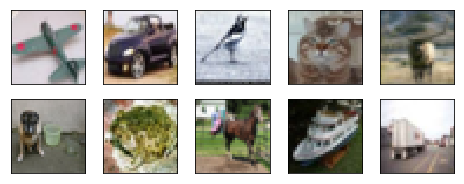

In [32]:
# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    #ax.set_title(num_classes[i])
    plt.imshow(im)
plt.show()

The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

It’s good practice to work with normalized data.

Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

Note, the data is loaded as integers, so we must cast it to float point values in order to perform the division

In [33]:
# Convert and pre-processing
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function
Max Pool layer with size 2×2
Dropout set to 25%
Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
Convolutional input layer, 64 feature maps with a size of 3×3, a rectifier activation function
Max Pool layer with size 2×2
Dropout set to 25%
Flatten layer
Fully connected layer with 512 units and a rectifier activation function
Dropout set to 50%
Fully connected output layer with 10 units and a softmax activation function

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
classifier = Sequential()

In [40]:
def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    sgd = tf.keras.optimizers.SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
# Train model

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


In [55]:
 from keras.models import *

In [63]:
cnn_n = base_model()

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [62]:
base_model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

AttributeError: 'function' object has no attribute 'fit'

In [57]:
# Fit model

cnn = base_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

AttributeError: 'function' object has no attribute 'fit'

In [58]:
def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

In this section, we can visualize the model structure. For this problem, we can use a library for Keras for investigating architectures and parameters of sequential models by Piotr Migdał.

In [59]:
# Vizualizing model structure

sequential_model_to_ascii_printout(cnn_n)

AttributeError: 'function' object has no attribute 'layers'